# Import

In [16]:
import pandas
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn import preprocessing
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [48]:
orignal_data = pandas.read_csv('train.csv' )
testdata = pandas.read_csv('test.csv' )
orignal_data.fillna(0)
orignal_data.head()
orignal_data.dropna(inplace=True)
testdata.dropna(inplace=True)
sns.set(style="darkgrid")


# Preprocessing

In [18]:
def preprocess(data):
    label_encoder = preprocessing.LabelEncoder() 
    data['Gender']= label_encoder.fit_transform(data['Gender']) 
    return data

In [32]:
def featureextraction(d):
    feature_cols = ['Age','Total_Bilirubin','Gender','Direct_Bilirubin','Albumin','Albumin_and_Globulin_Ratio']
    X=d[feature_cols]
    return (X , feature_cols)

In [33]:
data=preprocess(orignal_data)
testing=preprocess(testdata)
X ,colnames=featureextraction(data)
testing , colnames=featureextraction(testing)
y_orignal=orignal_data['Dataset']
y=data['Dataset']

# Correlation Matrix

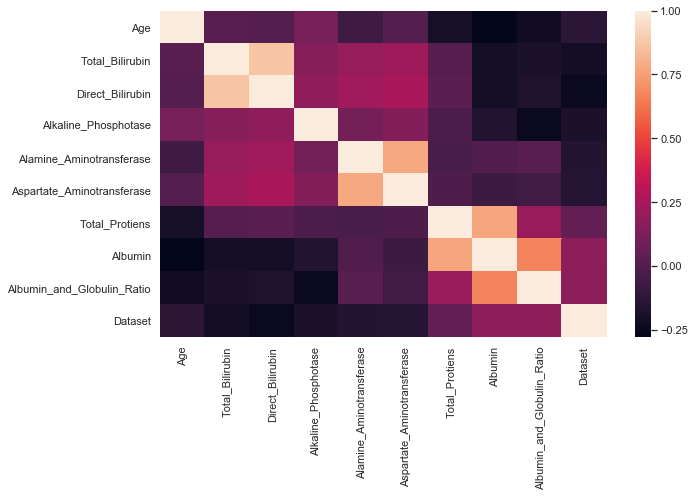

In [49]:
corr = orignal_data.corr()
plt.figure(figsize=(10 , 6))
sns.heatmap(corr)
plt.show()

# Training using different models

## SVM

In [52]:

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=1)
from sklearn.svm import SVC
clf = SVC(gamma='auto',random_state=1,probability=True,decision_function_shape='ovo')
clf.fit(X, y) 
print(metrics.accuracy_score(clf.predict(X_test),y_test))


0.8275862068965517


## Logistic Regression

In [ ]:

lgstclf = LogisticRegression(solver='newton-cg',multi_class='multinomial',max_iter=100000,tol=1e-2)
lgstclf.fit(X_train,y_train)
yv_pred = lgstclf.predict(x_test)
metrics.accuracy_score(yv_pred,y_test)


## Decision Tree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dtcmodel = DecisionTreeClassifier()
dtcmodel.fit(X_train,y_train)
metrics.accuracy_score(dtcmodel.predict(X_test),y_test)

##  KNeighbors

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knmodel = KNeighborsClassifier()
knmodel.fit(X_train,y_train)
metrics.accuracy_score(knmodel.predict(X_test),y_test)

### ///////////////////SVM - best accuracy/////////////////////

In [ ]:
answers = clf.predict(testing)
answers
resultFile = pandas.DataFrame({'predictions':answers})
resultFile.head()
resultFile.to_csv('predictions.csv')